#Introduction to neural network classification with Tensorflow

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

In [93]:
from sklearn.datasets import make_circles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

In [94]:
X,y=make_circles(n_samples=1000,noise=0.05,factor=0.8,random_state=42)

In [95]:
X.shape

(1000, 2)

In [96]:
y.shape

(1000,)

In [97]:
pd.DataFrame(np.c_[X,y])

,0,1,2
0,0.742207,0.246686,1.0
1,-0.734032,0.168692,1.0
2,-0.829859,0.221959,1.0
3,-0.429136,0.672230,1.0
4,0.445602,-0.894936,0.0
...,...,...,...
995,0.249091,0.925787,0.0
996,-0.985370,-0.288162,0.0
997,-0.128231,-0.826133,1.0
998,0.660905,-0.793190,0.0


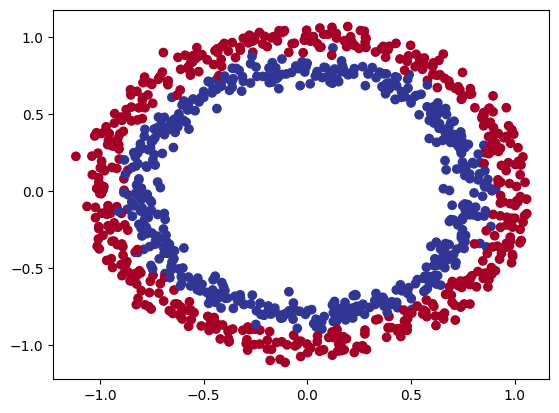

In [98]:
#colors=next(cycle(['g','b']))

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [99]:
import tensorflow as tf
import tensorflow.keras

In [100]:
#Creating first classification model
tf.random.set_seed(0)

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
model_1.fit(X,y,epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5115 - loss: 6.2753   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5492 - loss: 5.2648 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5513 - loss: 5.0807  
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5074 - loss: 6.6380 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5182 - loss: 6.6066 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5196 - loss: 6.5540 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5433 - loss: 5.0445 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5440 - loss: 5.0421 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5440 - loss: 5.0386 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5454 - loss: 5.0354 


In [101]:
# Try to improve the model by training for longer
model_1.fit(X,y,epochs=100,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4955 - loss: 8.1322   


[8.059046745300293, 0.5]

In [102]:
tf.random.set_seed(0)

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X,y,epochs=200,verbose=0)

model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4944 - loss: 0.6929  


[0.6933476328849792, 0.47600001096725464]

#Improving our model

In [103]:
pd.DataFrame(y).value_counts()

0    500
1    500
Name: count, dtype: int64

In [104]:
#trying yo improve our model by adding hidden layers and changing optimizer
tf.random.set_seed(0)

model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X,y,epochs=100,verbose=0)

model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5021 - loss: 0.6926


[0.6936830878257751, 0.4869999885559082]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


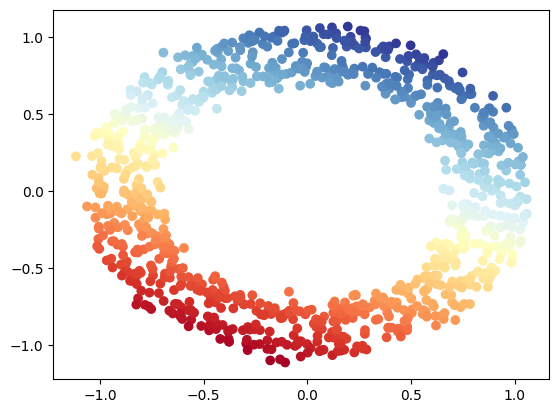

In [105]:
y_pred_model_3=model_3.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred_model_3,cmap=plt.cm.RdYlBu)

In [106]:
y_pred_model_3

array([[0.50285715],
       [0.4889029 ],
       [0.48917314],
       [0.501612  ],
       [0.47735333],
       [0.50199205],
       [0.50776607],
       [0.50124604],
       [0.47405946],
       [0.51174265],
       [0.47507527],
       [0.513803  ],
       [0.5079155 ],
       [0.49008617],
       [0.4846908 ],
       [0.4776044 ],
       [0.4771678 ],
       [0.47675532],
       [0.48270845],
       [0.47150266],
       [0.5056813 ],
       [0.5047434 ],
       [0.4715895 ],
       [0.5035566 ],
       [0.49273992],
       [0.48823583],
       [0.514091  ],
       [0.4955336 ],
       [0.4779462 ],
       [0.48835474],
       [0.4714302 ],
       [0.509639  ],
       [0.5071432 ],
       [0.50070584],
       [0.46829367],
       [0.499996  ],
       [0.49838224],
       [0.5103421 ],
       [0.4790732 ],
       [0.51041573],
       [0.4715817 ],
       [0.5136629 ],
       [0.47227398],
       [0.49442995],
       [0.472786  ],
       [0.476901  ],
       [0.4803855 ],
       [0.509

In [107]:
np.round(y_pred_model_3,decimals=0)

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],

In [108]:
np.argmax(y_pred_model_3,axis=0)

array([994])

In [109]:
np.argmax(y_pred_model_3,axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [110]:
array=np.random.uniform(1,10,(10,2))
array

array([[6.99993388, 7.27660414],
       [6.71632252, 1.14396849],
       [9.34443685, 4.56924756],
       [7.16364325, 5.81453336],
       [5.46351239, 6.26841686],
       [9.0423206 , 3.73005882],
       [4.35088842, 6.20698989],
       [5.30158463, 9.22791737],
       [9.89926672, 9.08461585],
       [1.36674048, 8.03256294]])

In [111]:
z=np.argmax(array,axis=1)
z

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [112]:
z.reshape(-1,1)

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1]])

In [113]:
def plot_decision_boundary(model,X,y):
  #Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max= X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min, y_max= X[:,1].min()-0.1, X[:,1].max()+0.1
  xx,yy= np.meshgrid(np.linspace(x_min,x_max,100),
                     np.linspace(y_min,y_max,100))

  # Create X value that we are going to make predictions on thse
  x_in=np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred=model.predict(x_in)

  # Check if the model is Binary classification or Multiclass classification
  if model.output_shape[-1] >1:
    print('Doing multiclass classification')
    # Reshape our predictions to get them ready for plottting
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print('Doing binary classification')
    # Reshape our predictions to get them ready for plottting
    y_pred=np.round(np.max(y_pred,axis=1)).reshape(xx.shape)


  # Plotting the decision boundaries
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu,edgecolors='k')
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())
  return y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


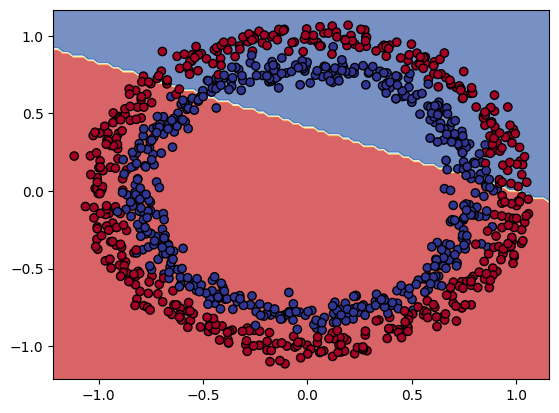

In [114]:
yy=plot_decision_boundary(model_3,X,y)

In [115]:
yy[75]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [116]:
X[:,0].min(), X[:,0].max()

(-1.1161528513253876, 1.0576079974659371)

In [117]:
X[:,1].min(), X[:,1].max()

(-1.1142627115008916, 1.068896513032579)

In [118]:
# Making a regression dataset
tf.random.set_seed(0)

#making dataset
X_reg=tf.range(0,1000,5)
y_reg=tf.range(100,1100,5)

#spliting data set
X_reg_train=X_reg[:150]
X_reg_test=X_reg[150:]
y_reg_train=y_reg[:150]
y_reg_test=y_reg[150:]

#fining datast to our model
#model_3.fit(X_reg_train,y_reg_train,epochs=100)    ***eccures errors*** yis continuous

In [119]:
tf.random.set_seed(0)

model_3_reg=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3_reg.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae'])

model_3_reg.fit(X_reg_train[:,None],y_reg_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 282.4636 - mae: 282.4636
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 184.1353 - mae: 184.1353 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84.5638 - mae: 84.5638   
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.7937 - mae: 52.7937 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74.8947 - mae: 74.8947 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.8238 - mae: 59.8238 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.9902 - mae: 39.9902 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.1475 - mae: 46.1475 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.0840 - mae: 41.0840 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.4423 - mae: 42.4423 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.9243 - mae: 39.9243 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.2659 - mae: 41.2659 
Epoch 13/100
5/5 ━━━

In [120]:
X_reg_train

<tf.Tensor: shape=(150,), dtype=int32, numpy=
array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
       325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
       390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
       455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
       520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
       585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
       650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
       715, 720, 725, 730, 735, 740, 745], dtype=int32)>

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


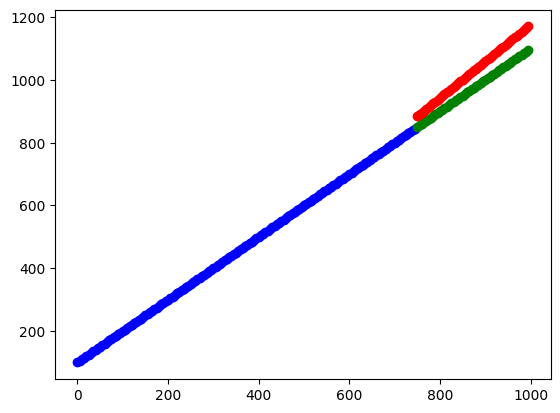

In [121]:
# Making predictions and plot
y_pred_model_3_reg=model_3_reg.predict(X_reg_test)

plt.scatter(X_reg_train, y_reg_train,c='b',label='training data')
plt.scatter(X_reg_test,y_reg_test,c='g',label='testing data')
plt.scatter(X_reg_test,y_pred_model_3_reg,c='r',label='training data')

## The missing piece: Non-linearity

In [122]:
X[:10]

array([[ 0.74220688,  0.24668576],
       [-0.7340323 ,  0.16869164],
       [-0.82985872,  0.22195899],
       [-0.42913559,  0.67223019],
       [ 0.44560223, -0.89493556],
       [-0.46988549,  0.70803745],
       [-0.01604538,  0.80562331],
       [ 0.75962295,  0.15952616],
       [-0.17569191, -0.79983689],
       [-0.11061613,  1.04220747]])

In [123]:
y[:100]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [124]:
# Setting activation function to linear
tf.random.set_seed(0)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                metrics=['accuracy'])

model_4.fit(X,y,epochs=100,verbose=1)

#model_3.evaluate(X,y)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4623 - loss: 3.7040
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5176 - loss: 0.7083 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5159 - loss: 0.6937 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4727 - loss: 0.6946 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4929 - loss: 0.6944
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4868 - loss: 0.6946
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4870 - loss: 0.6948
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4888 - loss: 0.6949
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4843 - loss: 0.6950
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4875 - loss: 0.6952
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4895 - loss: 0.6953
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accura

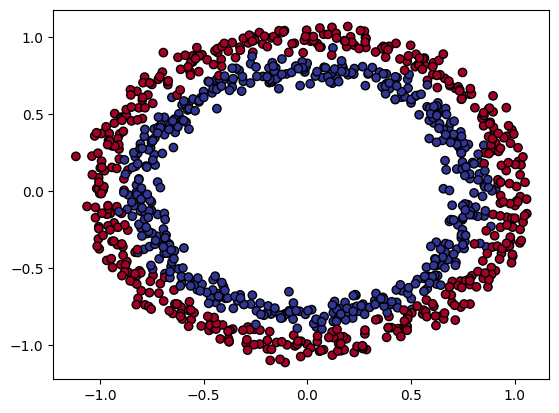

In [125]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu,edgecolors='k')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


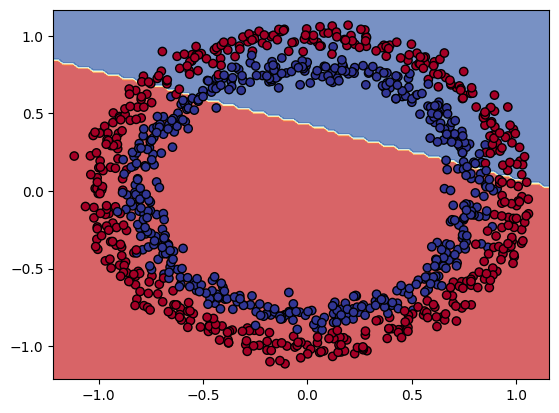

In [126]:
yy=plot_decision_boundary(model_4,X,y)

In [127]:
yy.shape

(100, 100)

In [128]:
pd.DataFrame(yy).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
count,100.000000,100.000000,100.00000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.00,100.00,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.140000,0.140000,0.15000,0.15000,0.15000,0.160000,0.160000,0.160000,0.170000,0.170000,0.170000,0.180000,0.180000,0.180000,0.190000,0.190000,0.190000,0.200000,0.200000,0.200000,0.21000,0.21000,0.21000,0.220000,0.220000,0.220000,0.230000,0.230000,0.240000,0.240000,0.240000,0.250000,0.250000,0.250000,0.260000,0.260000,0.260000,0.270000,0.270000,0.270000,0.280000,0.280000,0.280000,0.290000,0.290000,0.290000,0.300000,0.300000,0.300000,0.310000,0.310000,0.310000,0.320000,0.320000,0.320000,0.330000,0.330000,0.340000,0.340000,0.340000,0.350000,0.350000,0.350000,0.360000,0.360000,0.360000,0.370000,0.370000,0.370000,0.380000,0.380000,0.380000,0.390000,0.390000,0.390000,0.400000,0.400000,0.400000,0.410000,0.410000,0.410000,0.420000,0.420000,0.420000,0.43000,0.43000,0.440000,0.440000,0.440000,0.45,0.45,0.45,0.460000,0.460000,0.460000,0.470000,0.470000,0.470000,0.480000,0.480000
std,0.348735,0.348735,0.35887,0.35887,0.35887,0.368453,0.368453,0.368453,0.377525,0.377525,0.377525,0.386123,0.386123,0.386123,0.394277,0.394277,0.394277,0.402015,0.402015,0.402015,0.40936,0.40936,0.40936,0.416333,0.416333,0.416333,0.422953,0.422953,0.429235,0.429235,0.429235,0.435194,0.435194,0.435194,0.440844,0.440844,0.440844,0.446196,0.446196,0.446196,0.451261,0.451261,0.451261,0.456048,0.456048,0.456048,0.460566,0.460566,0.460566,0.464823,0.464823,0.464823,0.468826,0.468826,0.468826,0.472582,0.472582,0.476095,0.476095,0.476095,0.479372,0.479372,0.479372,0.482418,0.482418,0.482418,0.485237,0.485237,0.485237,0.487832,0.487832,0.487832,0.490207,0.490207,0.490207,0.492366,0.492366,0.492366,0.494311,0.494311,0.494311,0.496045,0.496045,0.496045,0.49757,0.49757,0.498888,0.498888,0.498888,0.50,0.50,0.50,0.500908,0.500908,0.500908,0.501614,0.501614,0.501614,0.502117,0.502117
min,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0000

In [129]:
# Setting hidden leayer activation function to non-linear
# Setting output leayer activation function to sigmoid

tf.random.set_seed(0)

model_5=tf.keras.Sequential([
    #tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(20,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.03),
                metrics=['accuracy'])

model_5.fit(X,y,epochs=100,verbose=0)

model_5.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9756 - loss: 0.0672  


[0.06656910479068756, 0.9750000238418579]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

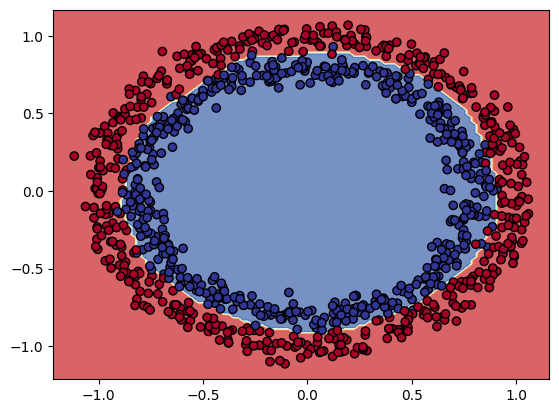

In [130]:
plot_decision_boundary(model_5,X,y)

In [131]:

tf.random.set_seed(0)

model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history=model_6.fit(X,y,epochs=100,verbose=1)

model_6.evaluate(X,y)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5037 - loss: 0.6969
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4920 - loss: 0.6930
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4883 - loss: 0.6926
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5085 - loss: 0.6921
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5084 - loss: 0.6914
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5229 - loss: 0.6904
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5088 - loss: 0.6887
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5030 - loss: 0.6872
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5030 - loss: 0.6856
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5080 - loss: 0.6834
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4993 - loss: 0.6791
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

[0.06344851106405258, 0.9760000109672546]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

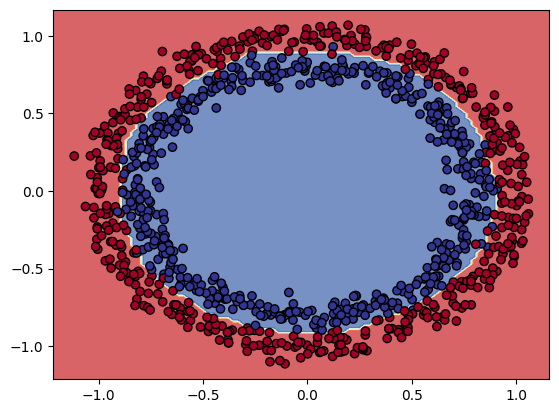

In [132]:
plot_decision_boundary(model_6,X,y)

In [133]:
# Create a toy tensor
A=tf.range(-10.,10)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

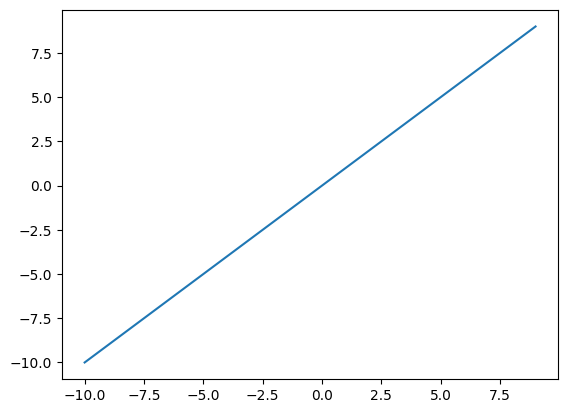

In [134]:
# Visualize our toy tensor
plt.plot(A,A)

tf.Tensor(
[4.5397872e-05 1.2339458e-04 3.3535014e-04 9.1105117e-04 2.4726233e-03
 6.6928510e-03 1.7986210e-02 4.7425874e-02 1.1920292e-01 2.6894143e-01
 5.0000000e-01 7.3105860e-01 8.8079703e-01 9.5257413e-01 9.8201376e-01
 9.9330717e-01 9.9752742e-01 9.9908900e-01 9.9966466e-01 9.9987662e-01], shape=(20,), dtype=float32)


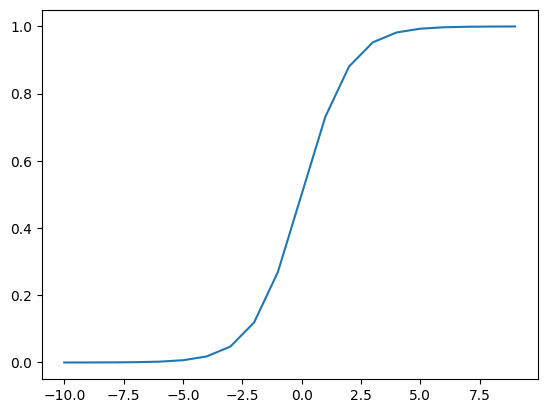

In [135]:
# Replicating sigmoid function
def sigmoid(x):
  return 1/(1+tf.exp(-x)) #e^x

print(sigmoid(A))

plt.plot(A,sigmoid(A))

A:  tf.Tensor(
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.], shape=(20,), dtype=float32)

 tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9.], shape=(20,), dtype=float32)


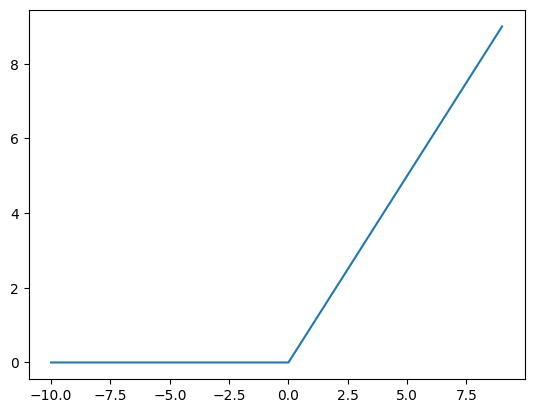

In [136]:
# Replicating relu function
def relu(x):
  return tf.maximum(x,0)

print('A: ',A)
print('\n',relu(A))

plt.plot(A,relu(A))

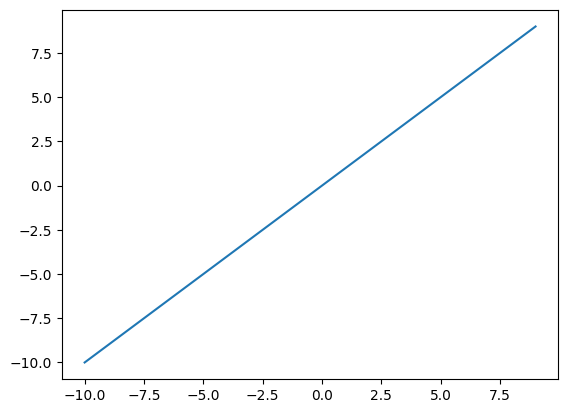

In [137]:
# Linear activation function
def linear(x):
  return tf.keras.activations.linear(A)

plt.plot(A,linear(A))

In [138]:
A==linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

##Evaluating and improving our classification

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2)

In [141]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [142]:
model_6.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

In [143]:
tf.random.set_seed(0)

model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                metrics=['accuracy'])

history=model_7.fit(X_train,y_train,epochs=20,verbose=1)

print()
#model_7.evaluate(X,y)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5084 - loss: 0.6894
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6180 - loss: 0.6653 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.6366  
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8281 - loss: 0.5916 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8616 - loss: 0.5242  
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8930 - loss: 0.4388 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9402 - loss: 0.3456 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9459 - loss: 0.2726 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9550 - loss: 0.2176
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9487 - loss: 0.1830 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9516 - loss: 0.1560 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

In [144]:
model_7.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9620 - loss: 0.0944  


[0.0986984372138977, 0.9649999737739563]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

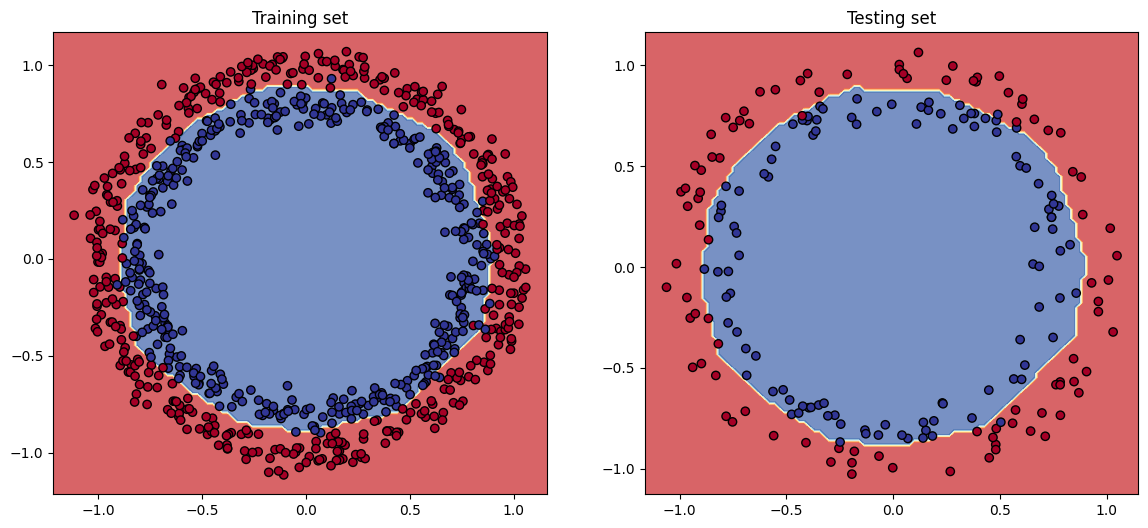

In [145]:
# Plotting decision boundary
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.title('Training set')
plot_decision_boundary(model_7,X_train,y_train)

plt.subplot(122)
plt.title('Testing set')
plot_decision_boundary(model_7,X_test,y_test)

##Plot the loss (or training ) curve

In [146]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.52375,0.682437
1,0.61000,0.662938
2,0.73250,0.631795
3,0.79375,0.584033
4,0.84250,0.514092
5,0.89000,0.424179
6,0.92750,0.331295
7,0.93875,0.260949
8,0.94750,0.210162
9,0.94750,0.177024


([<matplotlib.axis.XTick at 0x7fab907b6ce0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

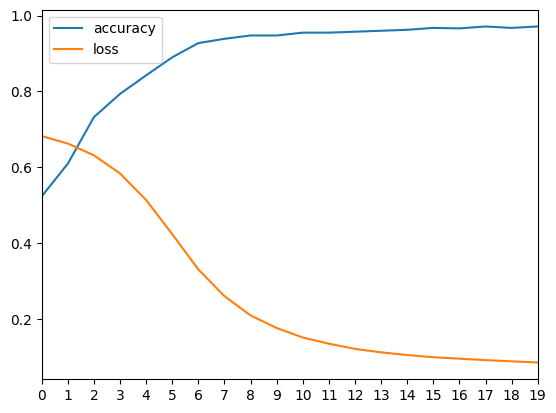

In [147]:
pd.DataFrame(history.history).plot()
plt.xticks(tf.range(20))

##Fining the best learning rate

* A learning rate callback
- Another model
- A modified loss curves plot

In [148]:
tf.random.set_seed(0)

model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Creating a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_8=model_8.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4822 - loss: 0.6970 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4830 - loss: 0.6967 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4815 - loss: 0.6965 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4830 - loss: 0.6962 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4819 - loss: 0.6959 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4779 - loss: 0.6955 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4777 - loss: 0.6951 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4781 - loss: 0.6947 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4769 - loss: 0.6942 - learning_

In [149]:
1e-4

0.0001

In [150]:
10**(5)

100000

In [151]:
1e-4 * 10**(1/20)

0.00011220184543019634

In [152]:
1e-4 * 10**(50/20)

0.0316227766016838

In [153]:
1e-4 * 10**(100/20)

10.0

In [154]:
pd.DataFrame(history_8.history)

,accuracy,loss,learning_rate
0,0.50250,0.693344,0.000100
1,0.50500,0.693044,0.000112
2,0.50250,0.692755,0.000126
3,0.50500,0.692441,0.000141
4,0.50375,0.692095,0.000158
...,...,...,...
95,0.49500,0.848862,5.623413
96,0.51500,0.806560,6.309574
97,0.47500,0.832803,7.079458
98,0.48750,0.913872,7.943282


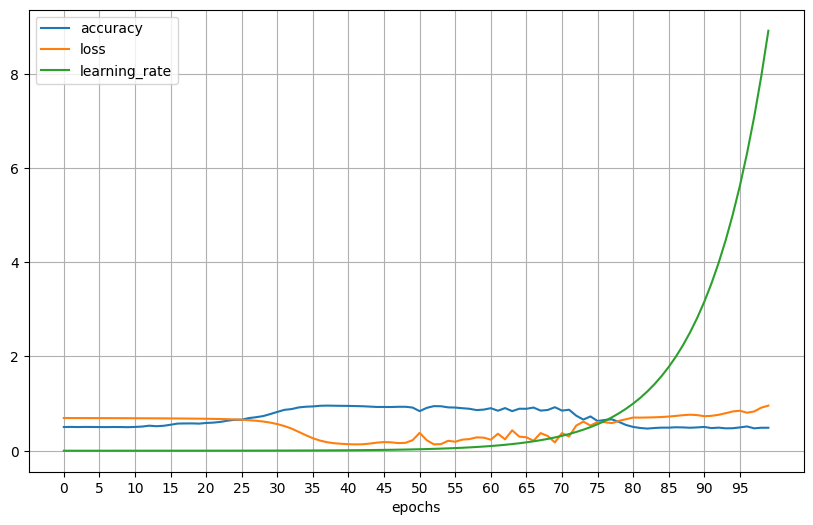

In [155]:
pd.DataFrame(history_8.history).plot(xlabel='epochs',figsize=(10,6))
#plt.ylim(0,1)
plt.xticks(tf.range(0,100,5))
plt.grid()

In [156]:
type(history_8.history)

dict

Text(0.5, 1.0, 'Learning Rate vs. Loss')

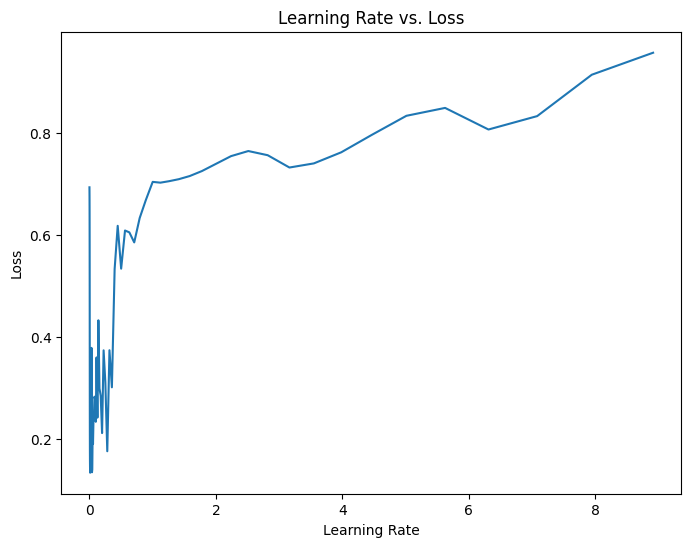

In [157]:
lr=1e-4 * (10 **(tf.range(100)/20))
#lr
plt.figure(figsize=(8,6))
plt.plot(lr,history_8.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs. Loss')
#plt.xlim(10**-3, 10**-1)

Text(0.5, 1.0, 'Learning Rate vs. Loss')

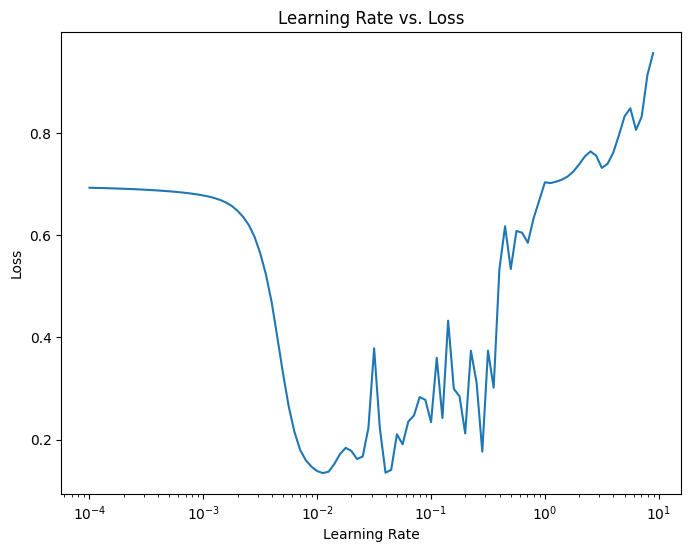

In [158]:
plt.figure(figsize=(8,6))
plt.semilogx(history_8.history['learning_rate'],history_8.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs. Loss')


In [159]:
# 0.017 -> 0.0017

In [160]:
model_7.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (32, 10)                    │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (32, 10)                    │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (32, 1)                     │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

In [161]:
# Creating model with setting best learning rate
tf.random.set_seed(0)

model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.02),
                metrics=['accuracy'])

model_9.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5354 - loss: 0.6927
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6885 - loss: 0.6555
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8266 - loss: 0.5746
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8845 - loss: 0.4223
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.2956
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9342 - loss: 0.2086
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9660 - loss: 0.1466 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9632 - loss: 0.1213 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9645 - loss: 0.1051 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9666 - loss: 0.0956  
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9633 - loss: 0.0903 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.968

In [162]:
model_9.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9659 - loss: 0.0865  


[0.0977625623345375, 0.9649999737739563]

In [163]:
model_7.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9620 - loss: 0.0944 


[0.0986984372138977, 0.9649999737739563]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


Text(0.5, 1.0, 'Testing set')

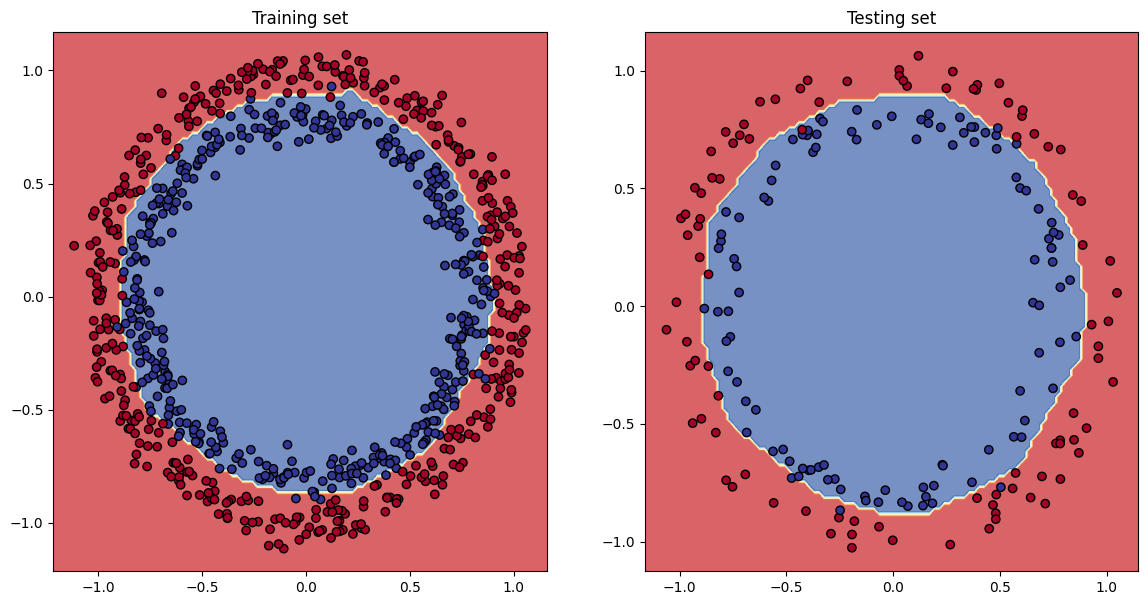

In [164]:
# Plotting decision boundarey for training and test set
plt.figure(figsize=(14,7))
plt.subplot(121)
plot_decision_boundary(model_9,X_train,y_train)
plt.title('Training set')

plt.subplot(122)
plot_decision_boundary(model_9,X_test,y_test)
plt.title('Testing set')

## More classification evaluation methods:

* Accuracy
* Precision
* Recall
* F1-score
- Confusion matrix
-Classification report (from scikit learn)

In [165]:
# chack the accuracy on our model
loss,accuracy=model_9.evaluate(X_test,y_test)
print(f'Model loss on the test set: {loss}')
print (f'Model accuracy on the test set: {accuracy*100 :.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9659 - loss: 0.0865 
Model loss on the test set: 0.0977625623345375
Model accuracy on the test set: 96.50


In [166]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

y_pred=model_9.predict(X_test)

cm=confusion_matrix(y_test,np.round(y_pred),)
cm

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 92,   2],
       [  5, 101]])

In [167]:
np.round(y_pred[:10])

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [168]:
X_test.shape

(200, 2)

In [169]:
X_train.shape

(800, 2)

In [170]:
import seaborn as sb

<Axes: >

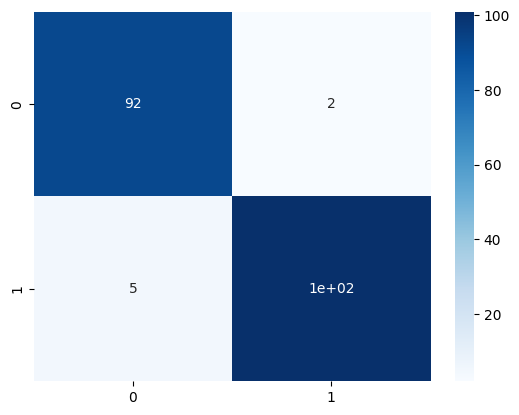

In [171]:
sb.heatmap(cm,cmap=plt.cm.Blues,annot=True)

In [172]:
np.sum(cm)

200

Text(50.722222222222214, 0.5, 'True label')

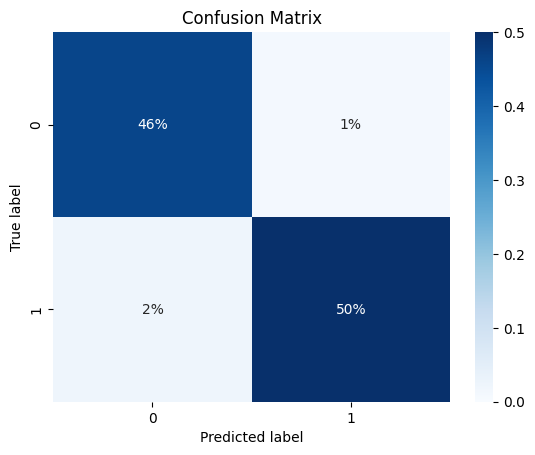

In [173]:
sb.heatmap(cm/np.sum(cm),cmap=plt.cm.Blues,annot=True,fmt='.0%',vmin=0,vmax=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')


## Multiclass classification

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist



In [3]:
# The data has already been sorted into training and test set
(train_data, train_labels), (test_data, test_labels)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
test_data.shape,    test_labels.shape

((10000, 28, 28), (10000,))

In [6]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [7]:
train_labels[0]

9

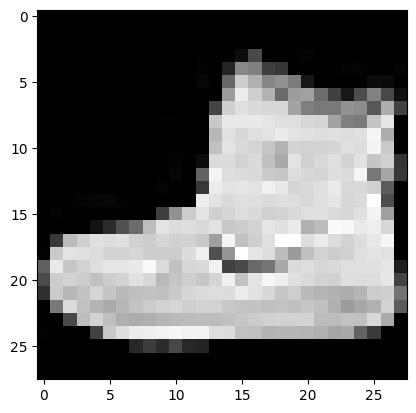

In [8]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0],cmap='gray');

In [9]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

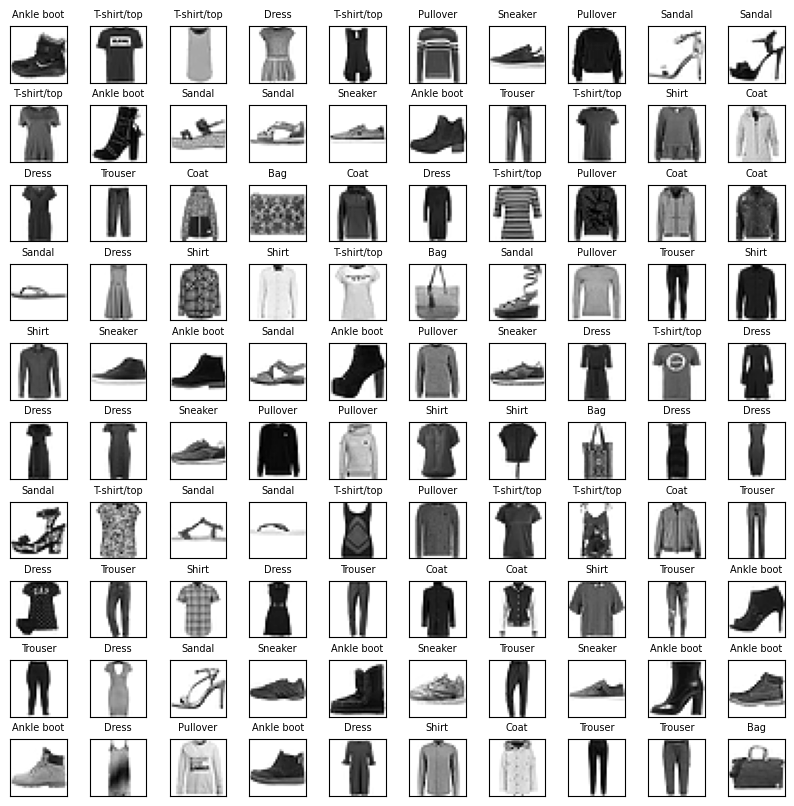

In [10]:
#plt.figure(figsize=(10,10))
plt.subplots(10,10,figsize=(10,10))
plt.subplots_adjust(wspace=.4,hspace=.4)

for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(train_data[i],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[i]],fontsize=7)
  plt.xticks(())
  plt.yticks(())


In [11]:

train_data[0:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

Text(0.5, 1.0, 'T-shirt/top')

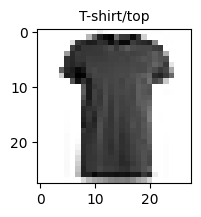

In [12]:
plt.figure(figsize=(2,2))
plt.imshow(train_data[17],cmap='binary')
plt.title(class_names[train_labels[17]],fontsize=10)

In [13]:
import random

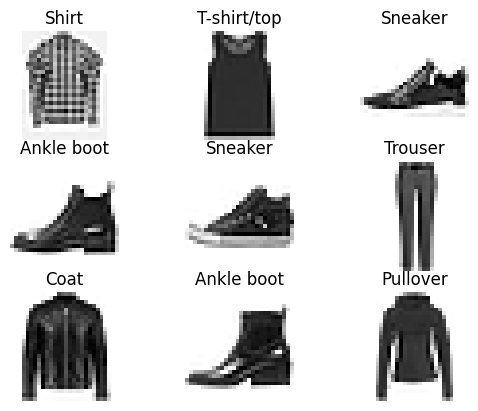

In [14]:
for i in range(9):
  plt.subplot(3,3,i+1)
  random_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index],cmap='binary')
  plt.title(class_names[train_labels[random_index]])
  plt.axis(False)
  plt.xlabel('')
  plt.ylabel('')

In [15]:
random.choice(range(10))

8

##Building multi-class classification model

Similar architecture to our binary classification but we have to tweak a few thinfs:

- Input shape: (28*28) pixels per image
- Output shape: (10) 1 per class
- Output layer activation function: Softmax()
- Loss function:
    - for one_hot encoded labels use CategoricalCrossentropy()
    - for integer labels use SparseCategoricalCrossentropy()
  

In [16]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [17]:
tf.one_hot(train_labels[:10],depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [18]:
# Creating first multi-class classification
tf.random.set_seed(0)

model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #input shape
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax) #output shape
])
model_11.compile(#loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_non_normalized= model_11.fit(train_data,
             #train_labels,
             tf.one_hot(train_labels,depth=10),
             epochs=10,
             validation_data=(test_data,
                              #test_labels
                              tf.one_hot(test_labels, depth=10)
                              ))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2227 - loss: 2.7817 - val_accuracy: 0.4087 - val_loss: 1.5324
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4031 - loss: 1.4507 - val_accuracy: 0.4812 - val_loss: 1.2522
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4877 - loss: 1.2127 - val_accuracy: 0.5371 - val_loss: 1.1461
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5575 - loss: 1.0700 - val_accuracy: 0.6196 - val_loss: 0.9382
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6697 - loss: 0.8590 - val_accuracy: 0.7030 - val_loss: 0.7503
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7176 - loss: 0.7060 - val_accuracy: 0.7087 - val_loss: 0.7403
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7237 - loss: 0.6861 - val_accuracy: 0.7149 - val_loss: 0.7202
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7278 - loss: 0.6766 - 

In [19]:
flatten_moddel=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
])
flatten_moddel.output_shape

(None, 784)

In [20]:
28*28

784

In [21]:
import numpy as np

np.array((1,2,3,4)).shape


(4,)

In [22]:
np.array((1,2,3,4))[:,None,None].shape

(4, 1, 1)

In [23]:
np.array((1,2,3,4))[None,None,:].shape

(1, 1, 4)

In [24]:
model_9.summary()

NameError: name 'model_9' is not defined

In [25]:
model_11.predict(train_data[0][None,:,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[7.0469633e-21, 2.3321999e-20, 1.4679056e-14, 5.7460754e-38,
        3.7448084e-16, 9.8747183e-03, 1.5533961e-09, 1.7970237e-03,
        4.9322959e-13, 9.8832828e-01]], dtype=float32)

In [26]:
train_data[0].shape

(28, 28)

In [27]:
train_data[0].reshape((1,28,28)).shape

(1, 28, 28)

In [28]:
train_data[0][None,:,:].shape

(1, 28, 28)

In [29]:
model_11.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,212 (94.58 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,142 (63.06 KB)

In [30]:
train_data.min(), train_data.max()

(0, 255)

In [31]:
# Getting data between 0 and 1 by deviding by 255
train_data_norm= train_data/255.
test_data_norm= test_data/255.

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [32]:
train_data_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
# Improve model by passing normalized data to fitness function
tf.random.set_seed(0)

model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_normalized= model_12.fit(train_data_norm,
                                tf.one_hot(train_labels,depth=10),
                                epochs=10,
                                validation_data=( test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6412 - loss: 1.0061 - val_accuracy: 0.8091 - val_loss: 0.5397
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8294 - loss: 0.4932 - val_accuracy: 0.8221 - val_loss: 0.5022
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8423 - loss: 0.4508 - val_accuracy: 0.8298 - val_loss: 0.4808
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8494 - loss: 0.4298 - val_accuracy: 0.8362 - val_loss: 0.4678
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8539 - loss: 0.4169 - val_accuracy: 0.8387 - val_loss: 0.4590
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8570 - loss: 0.4076 - val_accuracy: 0.8420 - val_loss: 0.4520
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8592 - loss: 0.4003 - val_accuracy: 0.8429 - val_loss: 0.4487
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8608 - loss: 0.3942 

In [34]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [35]:
import pandas as pd


(0.2, 2.0)

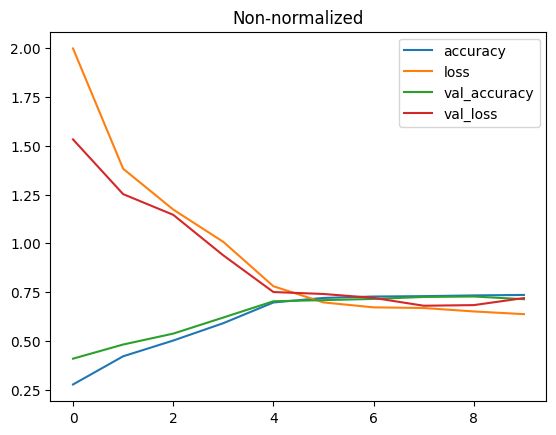

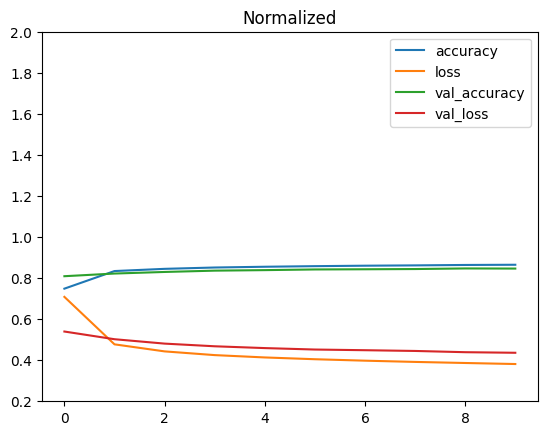

In [36]:
# Comparing normalized and non-normalized data
pd.DataFrame(history_non_normalized.history).plot(title='Non-normalized')
pd.DataFrame(history_normalized.history).plot(title='Normalized')
plt.ylim(.2,2)

## Finding the ideal learning rate

In [37]:
# Finding best learning rate by callback
tf.random.set_seed(0)

model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10 , activation='softmax')
])
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Creating callback for learning rate
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

lr_callback_history=model_13.fit(train_data_norm, train_labels,epochs=40,
                                 validation_data=(test_data_norm, test_labels),
                                 callbacks=[lr_scheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6681 - loss: 0.9622 - val_accuracy: 0.8206 - val_loss: 0.5146 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8358 - loss: 0.4802 - val_accuracy: 0.8326 - val_loss: 0.4782 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8475 - loss: 0.4391 - val_accuracy: 0.8379 - val_loss: 0.4621 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8548 - loss: 0.4187 - val_accuracy: 0.8441 - val_loss: 0.4468 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8577 - loss: 0.4065 - val_accuracy: 0.8453 - val_loss: 0.4428 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8590 - loss: 0.3992 - val_accuracy: 0.8465 - val_loss: 0.4340 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8609 - l

In [38]:
1e-3 * 10**(1/40)

0.001059253725177289

In [39]:
1e-3 * 10**(40/20)

0.1

In [40]:
lr_callback_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

Text(0.5, 1.0, 'Learning rate vs. Loss')

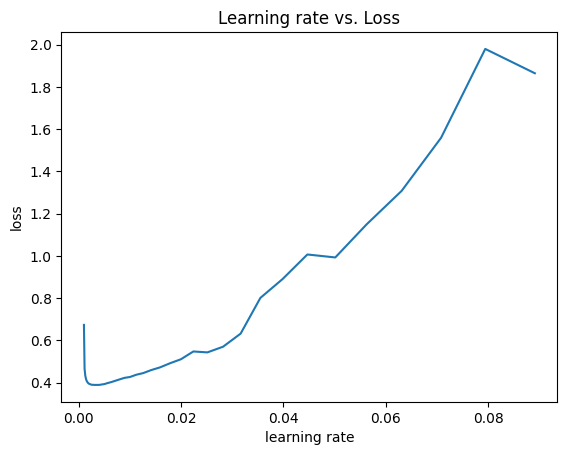

In [41]:
plt.plot(lr_callback_history.history['learning_rate'], lr_callback_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Learning rate vs. Loss')

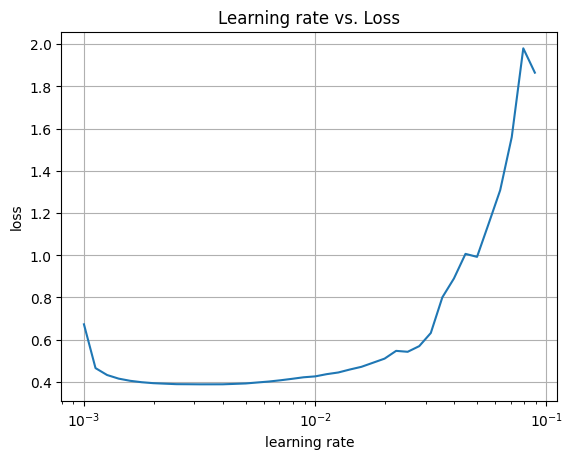

In [42]:
plt.semilogx(lr_callback_history.history['learning_rate'], lr_callback_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Learning rate vs. Loss')
plt.grid()
#plt.xlim(0.001,0.002)

In [43]:
1*10**-3, 2*10**-3 # Ideal learning rate is between 0.001 and 0.002

(0.001, 0.002)

In [44]:
# Creating model with ideal learning rate
tf.random.set_seed(0)

model_14=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

model_14.fit(train_data_norm, train_labels, epochs=20,
             validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6422 - loss: 0.9987 - val_accuracy: 0.8070 - val_loss: 0.5530
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8251 - loss: 0.5044 - val_accuracy: 0.8254 - val_loss: 0.5029
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8390 - loss: 0.4584 - val_accuracy: 0.8333 - val_loss: 0.4782
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8464 - loss: 0.4344 - val_accuracy: 0.8392 - val_loss: 0.4659
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8515 - loss: 0.4198 - val_accuracy: 0.8410 - val_loss: 0.4554
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8563 - loss: 0.4084 - val_accuracy: 0.8434 - val_loss: 0.4496
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8588 - loss: 0.3992 - val_accuracy: 0.8439 - val_loss: 0.4453
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8616 - loss: 0.3922 -

##Evaluting our multi-class classification model

Steps to evaluate our multi-class classification model:
- Evaluating its performance using other classification metrics(such as a confusion matrics)
- Assess some of predictions(through visualization)
- Improve its results(by training for longer or changing architecture)
- Save and export it for use in an application

Let's go through the top 2...

In [45]:
import seaborn as sb
from sklearn.metrics import confusion_matrix

In [46]:
# Pay attention to make prediction on a same kind of data your model was trained on
# if the model was trained by normalized data you should make prediction by normalized data
y_probs=model_14.predict(test_data_norm)
y_probs.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 10)

In [47]:
test_data[0].shape, test_data_norm[0].shape

((28, 28), (28, 28))

In [48]:
y_probs[10], tf.argmax(y_probs[10]), class_names[tf.argmax(y_probs[10])]

(array([8.8248099e-04, 1.5494642e-04, 2.2903235e-01, 3.4613141e-03,
        7.0169365e-01, 3.1671240e-18, 6.4406715e-02, 7.1720669e-06,
        3.6137371e-04, 2.9476567e-14], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=4>,
 'Coat')

In [49]:
list(enumerate(class_names))

[(0, 'T-shirt/top'),
 (1, 'Trouser'),
 (2, 'Pullover'),
 (3, 'Dress'),
 (4, 'Coat'),
 (5, 'Sandal'),
 (6, 'Shirt'),
 (7, 'Sneaker'),
 (8, 'Bag'),
 (9, 'Ankle boot')]

In [50]:
y_preds=y_probs.argmax(axis=1)
y_preds.shape

(10000,)

In [51]:
(y_preds == test_labels).sum()

8545

In [52]:
(y_preds != test_labels).sum()

1455

In [53]:
8325/10000 *100

83.25

In [54]:
cm=confusion_matrix(test_labels,y_preds)

([<matplotlib.axis.YTick at 0x79a9847799f0>,
 [Text(0, 0.5, 'T-shirt/top'),
  Text(0, 1.5, 'Trouser'),
  Text(0, 2.5, 'Pullover'),
  Text(0, 3.5, 'Dress'),
  Text(0, 4.5, 'Coat'),
  Text(0, 5.5, 'Sandal'),
  Text(0, 6.5, 'Shirt'),
  Text(0, 7.5, 'Sneaker'),
  Text(0, 8.5, 'Bag'),
  Text(0, 9.5, 'Ankle boot')])

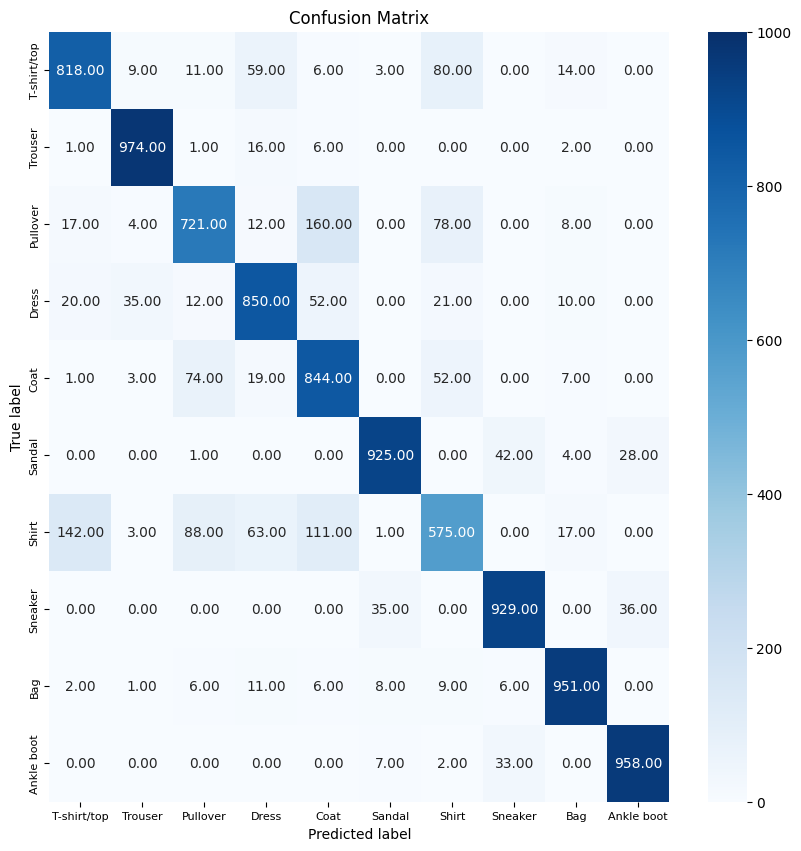

In [55]:
plt.figure(figsize=(10,10))
sb.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='.2f', vmin=0, vmax=1000,)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(0,10)+.5, class_names, fontsize=8)
plt.yticks(np.arange(0,10)+.5, class_names, fontsize=8)

([<matplotlib.axis.YTick at 0x79a9b11af2e0>,
 [Text(0, 0.5, 'T-shirt/top'),
  Text(0, 1.5, 'Trouser'),
  Text(0, 2.5, 'Pullover'),
  Text(0, 3.5, 'Dress'),
  Text(0, 4.5, 'Coat'),
  Text(0, 5.5, 'Sandal'),
  Text(0, 6.5, 'Shirt'),
  Text(0, 7.5, 'Sneaker'),
  Text(0, 8.5, 'Bag'),
  Text(0, 9.5, 'Ankle boot')])

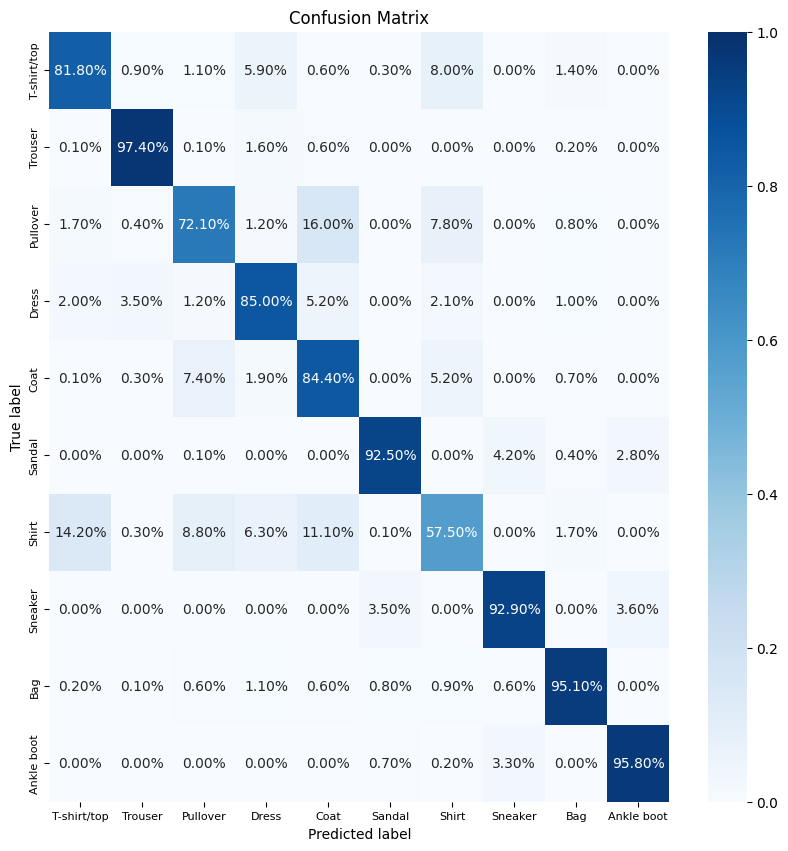

In [56]:
plt.figure(figsize=(10,10))
sb.heatmap(cm/1000, cmap=plt.cm.Blues, annot=True, fmt='.2%', vmin=0, vmax=1,)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(0,10)+.5, class_names, fontsize=8)
plt.yticks(np.arange(0,10)+.5, class_names, fontsize=8)

In [57]:
np.arange(0,10)+.5

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

##Creating a fun little function:
- Plot a random image
- Make a prediction on said image
- Label the plot with the truth label and the predicted one


In [58]:
random.choice(range(len(test_data))), random.randint(0,len(test_data))

(6397, 403)

In [59]:
def plot_random_image(model, images, true_labels, classes):
  '''
  Picks a random image, plot it and lable it by both true and predict lables
  '''
  # Set a random integer
  i= random.randint(0, len(images))

  # Create a predictions and target
  target_image=images[i]
  pred_image=model.predict(target_image.reshape(1,28,28))

  true_label=classes[true_labels[i]]
  pred_label=classes[pred_image.argmax()]

  # Plotting the image
  plt.figure(figsize=(3,3))
  plt.imshow(target_image, cmap=plt.cm.binary, )

  # Changing color depending on on prediction
  if true_label == pred_label:
    color='green'
  else:
    color='red'

  # Adding xlabel information
  plt.xlabel(f'Pred: {pred_label}  {tf.reduce_max(pred_image)*100 :.0f}% '
  f'\n\nTrue: {true_label}', color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


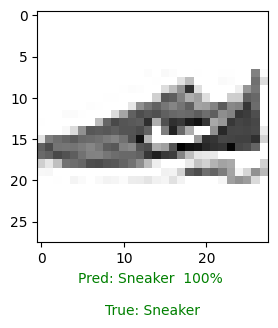

In [63]:
plot_random_image(model_14, test_data_norm, test_labels, class_names)

##What patterns is our model learning

In [64]:
model_14.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,212 (94.58 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,142 (63.06 KB)

In [67]:
model_14.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [68]:
model_14.layers[1]

<Dense name=dense_9, built=True>

In [74]:
wheights, biases= model_14.layers[1].get_weights()

In [75]:
wheights.shape, wheights

((784, 10),
 array([[ 0.7292454 , -0.2992991 , -0.79416525, ...,  0.7348934 ,
         -0.07567838, -0.6995709 ],
        [ 1.0998461 ,  0.7167167 , -0.65621805, ...,  0.22582693,
          0.03413925, -0.6216976 ],
        [ 0.5014463 , -0.221428  , -0.81965953, ...,  0.8785526 ,
         -0.27676263, -1.1614798 ],
        ...,
        [ 0.34823605, -0.13677718,  0.07437393, ...,  0.38662645,
          0.7312715 , -0.35686615],
        [ 1.004593  ,  0.15260719, -0.6499753 , ...,  0.05376406,
          0.55112755,  0.20884314],
        [ 0.87004864, -0.3839503 ,  0.09708427, ...,  0.34109187,
         -0.15349123, -0.01184471]], dtype=float32))

In [77]:
# Ckeck out bias vector
biases.shape, biases

((10,),
 array([ 1.1104287 , -0.42440212,  1.1454294 ,  0.7824321 ,  0.04173443,
         0.46921793,  1.002689  ,  0.27704066, -0.15656489, -0.22258674],
       dtype=float32))

In [78]:
# Check out input and output shape of our model
from tensorflow.keras.utils import plot_model

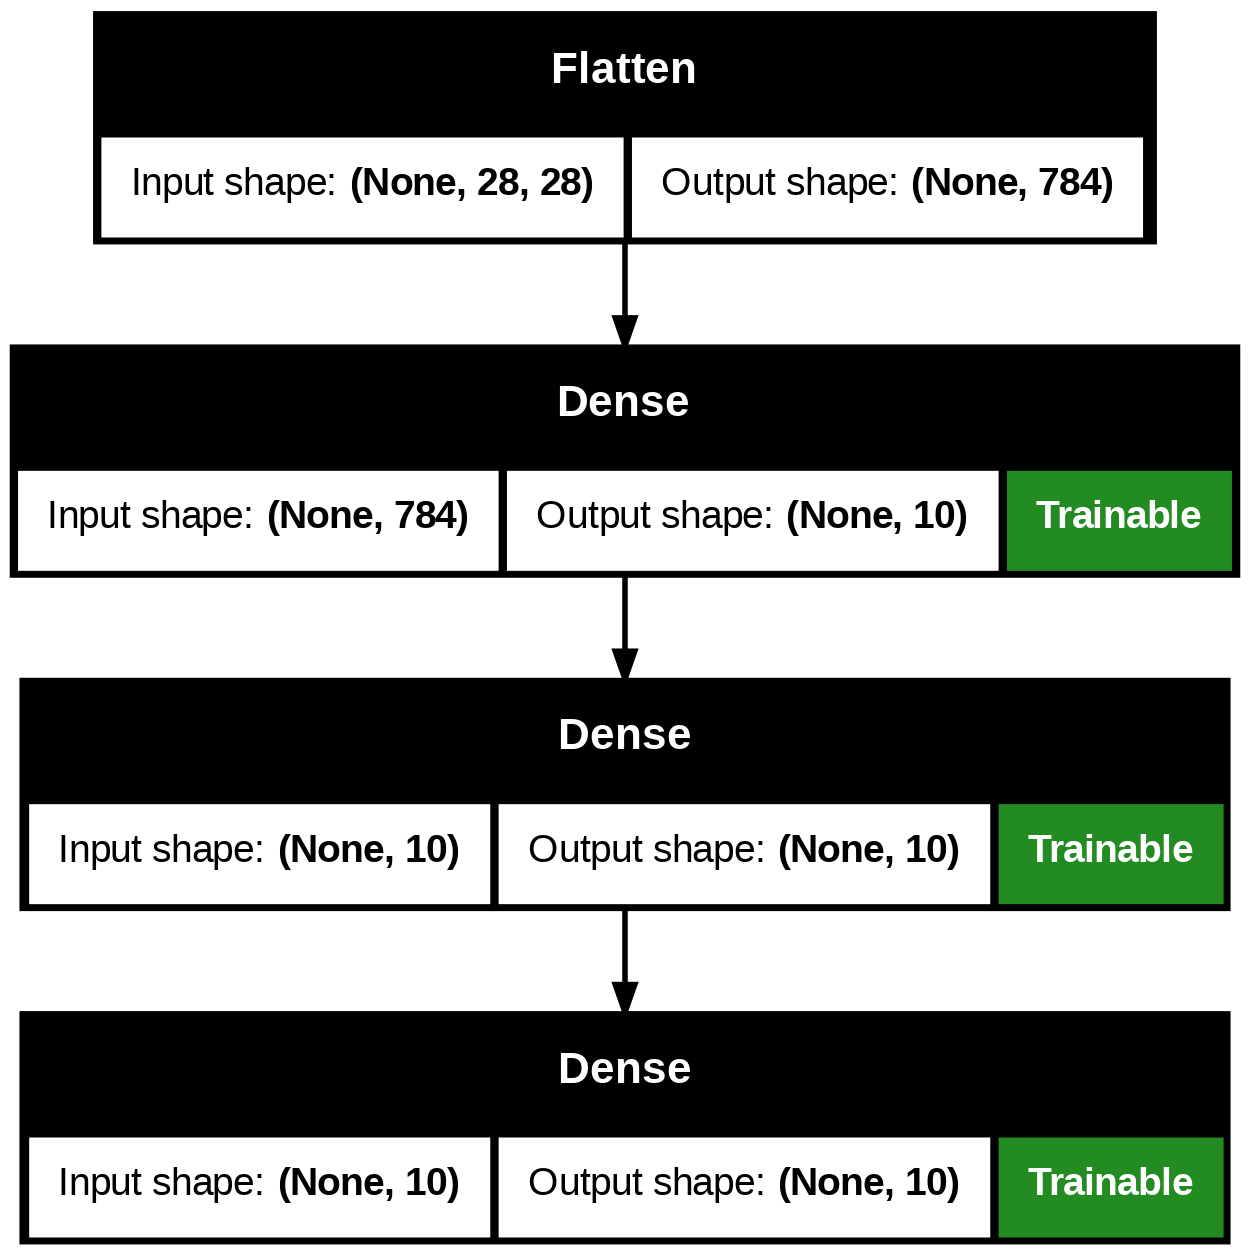

In [83]:
plot_model(model_14,show_trainable=True,show_shapes=True)

In [ ]:
##F